In [1]:
import time
import numpy as np
import cv2
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import signal
import os, errno
import glob

In [2]:
## get smoothened centroid to 1) Draw tracks 2) do calculate radial distance from flower center

In [3]:
Centroidfiles = pd.read_csv(r"./dataFolders/Output/KinematicAnalysis_Final/LowPassFilteredCentroidInPixelsSpace.csv")
Centroidfiles.head()

,Unnamed: 0,name,visit,flower_r,flower_x,flower_y,x,y,x_pixel,y_pixel,x_filtered,y_filtered
0,0,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN
1,1,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN
2,2,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN
3,3,L0.1_c-3_m10,last,74,310,233,0.810811,2.297297,24.0,68.0,23.997467,67.98341
4,4,L0.1_c-3_m10,last,74,310,233,1.013514,2.770270,30.0,82.0,24.708767,143.71776


In [4]:
# add the distance measurement to all points

In [5]:
Centroidfiles['cent_x'] = Centroidfiles['x_filtered'] - Centroidfiles['flower_x']
Centroidfiles['cent_y'] = Centroidfiles['y_filtered'] - Centroidfiles['flower_y']

In [6]:
Centroidfiles['distance'] = Centroidfiles.loc[:,['cent_x', 'cent_y']].apply(np.linalg.norm, axis=1, ord = 2)
Centroidfiles['distanceincms'] = Centroidfiles['distance']*2.5/Centroidfiles['flower_r']

In [7]:
Centroidfiles.loc[10:15, :]

,Unnamed: 0,name,visit,flower_r,flower_x,flower_y,x,y,x_pixel,y_pixel,x_filtered,y_filtered,cent_x,cent_y,distance,distanceincms
10,10,L0.1_c-3_m10,last,74,310,233,1.418919,9.493243,42.0,281.0,51.800238,246.110895,-258.199762,13.110895,258.532421,8.734203
11,11,L0.1_c-3_m10,last,74,310,233,1.925676,8.547297,57.0,253.0,55.056193,257.054971,-254.943807,24.054971,256.076134,8.651221
12,12,L0.1_c-3_m10,last,74,310,233,2.770270,8.006757,82.0,237.0,57.623439,263.936924,-252.376561,30.936924,254.265652,8.590056
13,13,L0.1_c-3_m10,last,74,310,233,1.486486,8.614865,44.0,255.0,60.409834,273.545573,-249.590166,40.545573,252.862007,8.542635
14,14,L0.1_c-3_m10,last,74,310,233,2.060811,10.675676,61.0,316.0,65.397684,286.841371,-244.602316,53.841371,250.457954,8.461417
15,15,L0.1_c-3_m10,last,74,310,233,2.162162,10.777027,64.0,319.0,72.377219,298.560488,-237.622781,65.560488,246.501042,8.327738


In [8]:
Centroidfiles.to_csv('./dataFolders/Output/KinematicAnalysis_Final/LowPassFiltered_CentroidAndDistanceData.csv')

## compute paramters and draw plots

In [3]:
# load centroid file wih distance and centroid data

df = pd.read_csv('./dataFolders/Output/KinematicAnalysis_Final/LowPassFiltered_CentroidAndDistanceData.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,name,visit,flower_r,flower_x,flower_y,x,y,x_pixel,y_pixel,x_filtered,y_filtered,cent_x,cent_y,distance,distanceincms
0,0,0,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,L0.1_c-3_m10,last,74,310,233,0.810811,2.297297,24.0,68.0,23.997467,67.98341,-286.002533,-165.01659,330.193767,11.155195
4,4,4,L0.1_c-3_m10,last,74,310,233,1.013514,2.770270,30.0,82.0,24.708767,143.71776,-285.291233,-89.28224,298.935455,10.099171


In [4]:
# remove Problematic Files

listProbs = pd.read_csv(r'G:\My Drive\Mahad\Light Level Experiments\Data Output from Analysis\VideosWithMarkers\FirstLastTroubleVideos_v4\names.csv')
listProbs['name'] = listProbs['name'].str[1:]
listProbs.head()

# df.name.str.contains(df.name + '_' + df.visitNum)

,Unnamed: 0,name
0,0,L0.1_c-3_m10_firstVisit.csv
1,1,L0.1_c-3_m10_lastVisit.csv
2,2,L0.1_c-3_m12_firstVisit.csv
3,3,L0.1_c-3_m12_lastVisit.csv
4,4,L0.1_c-3_m23_lastVisit.csv


In [5]:
df['string'] = df.name + '_' + df.visit + 'Visit.csv'

sub_df= df[pd.DataFrame(df.string.tolist()).isin(listProbs.name.tolist()).any(1) == False]

In [6]:
sub_df.head()

,Unnamed: 0,Unnamed: 0.1,name,visit,flower_r,flower_x,flower_y,x,y,x_pixel,y_pixel,x_filtered,y_filtered,cent_x,cent_y,distance,distanceincms,string
2818,2818,2818,L0.1_c-3_m2,first,74,309,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L0.1_c-3_m2_firstVisit.csv
2819,2819,2819,L0.1_c-3_m2,first,74,309,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L0.1_c-3_m2_firstVisit.csv
2820,2820,2820,L0.1_c-3_m2,first,74,309,233,14.054054,16.216216,416.0,480.0,415.991725,479.978923,106.991725,246.978923,269.157608,9.093162,L0.1_c-3_m2_firstVisit.csv
2821,2821,2821,L0.1_c-3_m2,first,74,309,233,12.027027,15.777027,356.0,467.0,425.584860,471.956375,116.584860,238.956375,265.880008,8.982433,L0.1_c-3_m2_firstVisit.csv
2822,2822,2822,L0.1_c-3_m2,first,74,309,233,17.398649,15.810811,515.0,468.0,422.540000,464.678111,113.540000,231.678111,258.004028,8.716352,L0.1_c-3_m2_firstVisit.csv


In [7]:
df_use = sub_df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'flower_r'
                               , 'flower_x', 'flower_y', 'x_pixel', 'y_pixel'])
df_use[['lightLevel', 'mothID']] =  df_use['name'].str.split('_', n = 1, expand = True)

In [8]:
df_use.head()

,name,visit,x,y,x_filtered,y_filtered,cent_x,cent_y,distance,distanceincms,string,lightLevel,mothID
2818,L0.1_c-3_m2,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L0.1_c-3_m2_firstVisit.csv,L0.1,c-3_m2
2819,L0.1_c-3_m2,first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L0.1_c-3_m2_firstVisit.csv,L0.1,c-3_m2
2820,L0.1_c-3_m2,first,14.054054,16.216216,415.991725,479.978923,106.991725,246.978923,269.157608,9.093162,L0.1_c-3_m2_firstVisit.csv,L0.1,c-3_m2
2821,L0.1_c-3_m2,first,12.027027,15.777027,425.584860,471.956375,116.584860,238.956375,265.880008,8.982433,L0.1_c-3_m2_firstVisit.csv,L0.1,c-3_m2
2822,L0.1_c-3_m2,first,17.398649,15.810811,422.540000,464.678111,113.540000,231.678111,258.004028,8.716352,L0.1_c-3_m2_firstVisit.csv,L0.1,c-3_m2


In [15]:
len(df.string.unique()), len(df_use.string.unique())

(110, 75)

In [16]:
len(listProbs.name.values)

35

In [9]:
treatments = ['L0.1' , 'L50']
visits = ['first', 'last']

In [10]:
for v, test_df in df_use.groupby('visit'):
    for t, final in test_df.groupby('lightLevel'):
        l = len(final.mothID.unique())
        print('Num of moths for %s and %s is %i' %(v, t, l))

Num of moths for first and L0.1 is 21
Num of moths for first and L50 is 18
Num of moths for last and L0.1 is 18
Num of moths for last and L50 is 18


## plot individual and cummulative heatmaps

In [19]:
colorScheme = {'L0.1':plt.cm.Purples_r, 'L50':plt.cm.Oranges_r}

In [20]:
def slicePandas(df, lightLevel, visitNum):
    subdf = df[df.visit == visitNum]
    subsubdf = subdf[subdf.lightLevel == lightLevel]
    return(subsubdf)

In [21]:
def addAllHist(df):
    h = np.zeros((50,50))
    
    for m, test in df.groupby('mothID'):
        x = test.loc[test.x_filtered.notna(), 'x_filtered'] 
        y = test.loc[test.y_filtered.notna(), 'y_filtered']

        heatmap, xedges, yedges = np.histogram2d(x, y, bins = 50)
        heatmap = heatmap/heatmap.max()
        h = h + heatmap
    return(h)

In [22]:
def plotHist(heatmap, cmap, ax):
    
    cmap.set_under(color='black')
    im = ax.imshow(heatmap/heatmap.max()
                 ,  extent = [0, 648, 488, 0]
                 , origin = 'upper'
                 , cmap = cmap
                 , vmin = 0.05)
    ax.axis('off')
    # ax[ii].set_title(v + '_' + l)
#     clr = plt.colorbar(im)

In [23]:
new_df = slicePandas(df_use, 'L0.1', 'first')
low_first = addAllHist(new_df)

new_df = slicePandas(df_use, 'L0.1', 'last')
low_last = addAllHist(new_df)

new_df = slicePandas(df_use, 'L50', 'first')
high_first = addAllHist(new_df)

new_df = slicePandas(df_use, 'L50', 'last')
high_last = addAllHist(new_df)

allhist = [low_first, low_last, high_first, high_last]

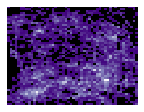

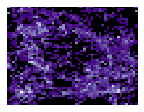

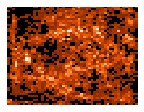

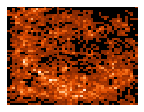

In [24]:
## plot the histograms and save the figures
w = 7/3 
h = w

ii = 0
vv = 0
for listHist in allhist:
    if ii == 0 or ii == 1:
        cmap = colorScheme['L0.1']
        if vv == 0:
            name = 'low_first'
        else: 
            name = 'low_last'
    else:
        cmap = colorScheme['L50']
        if vv == 2:
            name = 'high_first'
        else:
            name = 'high_last'

    
    f, ax = plt.subplots(figsize = (w,h))
    plotHist(listHist, cmap, ax)
    plt.savefig('./dataFolders/Output/KinematicAnalysis_Final/Figures/' + 'heatmap_filteredCentroids_' + name + '.pdf')
    ii+=1
    vv+=1

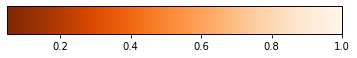

In [25]:
# cmap = plt.cm.Purples_r
# cmap.set_under(color='black')
figname = ['low', 'high']
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

norm = mpl.colors.Normalize(vmin=0.05, vmax=1)

for i, c in enumerate(colorScheme):
#     print(c)
    cmap = colorScheme[c]
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm = norm,
                                    orientation='horizontal')
    plt.savefig('./dataFolders/Output/KinematicAnalysis_Final/Figures/' + figname[i] + '_colorbar.pdf')

In [26]:
# plot individual moth histrogram and see why is first visit looking like a big glob!

for moth, sub in df.groupby('name'):
    for v, specific in sub.groupby('visit'):
        f, ax = plt.subplots()
        x = specific.loc[specific.x_filtered.notna(), 'x_filtered'] 
        y = specific.loc[specific.y_filtered.notna(), 'y_filtered']

        heatmap, xedges, yedges = np.histogram2d(x, y, bins = 50)
        heatmap = heatmap/heatmap.max()

        if 'L50' in moth:
            cmap = colorScheme['L50']
        else:
            cmap = colorScheme['L0.1']

        cmap.set_under(color='black')

        im = ax.imshow(heatmap/heatmap.max()
                     ,  extent = [0, 648, 488, 0]
                     , origin = 'upper'
                     , cmap = cmap
                     , vmin = 0.01)
        ax.axis('off')

        f.colorbar(im, ax = ax)
    #     cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
    #                                 orientation='vertical')

        plt.savefig('./dataFolders/Output/KinematicAnalysis_Final/Figures/IndividualMoths/Filtered/' + moth + '_' + v + '_heatmap.pdf')
        plt.close(f)

In [27]:
listProbs[listProbs.name.str.contains('first') & listProbs.name.str.contains('L0.1')]

,Unnamed: 0,name
0,0,L0.1_c-3_m10_firstVisit.csv
2,2,L0.1_c-3_m12_firstVisit.csv
7,7,L0.1_c-3_m45_firstVisit.csv
9,9,L0.1_c-3_m47_firstVisit.csv
11,11,L0.1_c-3_m50_firstVisit.csv
13,13,L0.1_c-3_m54_firstVisit.csv
14,14,L0.1_c-3_m57_firstVisit.csv
16,16,L0.1_c-3_m5_firstVisit.csv


# compute average distance and save data

In [11]:
# plot distance from flower center
# get average distance for each moth
# dataFrame = mothID, first, last, low, high

Dist_df = pd.DataFrame(data = None, columns = ['mothID', 'visit', 'lightLevel', 'distance'])
i = 0
for v, sub in df_use.groupby('visit'):
    for tt, specific in sub.groupby('lightLevel'):
        for moth, final in specific.groupby('mothID'):
            mean_dist = final.distanceincms.median()
            Dist_df.loc[i,'distance'] = mean_dist
            Dist_df.loc[i, 'mothID'] = moth
            Dist_df.loc[i, 'lightLevel'] = tt
            Dist_df.loc[i, 'visit'] = v
            i+=1   

In [12]:
Dist_df.head()

,mothID,visit,lightLevel,distance
0,c-3_m2,first,L0.1,5.1141
1,c-3_m20,first,L0.1,5.30565
2,c-3_m21,first,L0.1,5.47941
3,c-3_m22,first,L0.1,7.74167
4,c-3_m23,first,L0.1,8.74137


In [13]:
Dist_df['distance']=Dist_df['distance'].astype('float64')

In [14]:
low_first = Dist_df[(Dist_df.lightLevel == 'L0.1') & (Dist_df.visit == 'first')].distance.values
high_first = Dist_df[(Dist_df.lightLevel == 'L50') & (Dist_df.visit == 'first')].distance.values

low_last = Dist_df[(Dist_df.lightLevel == 'L0.1') & (Dist_df.visit == 'last')].distance.values
high_last = Dist_df[(Dist_df.lightLevel == 'L50') & (Dist_df.visit == 'last')].distance.values

In [15]:
from scipy import stats

stats.mannwhitneyu(low_first, high_first)

MannwhitneyuResult(statistic=126.0, pvalue=0.03914137635517361)

In [16]:
stats.mannwhitneyu(low_last, high_last)

MannwhitneyuResult(statistic=90.0, pvalue=0.011843763236007322)

In [17]:
# export the average distance as a csv
Dist_df.to_csv('./dataFolders/Output/KinematicAnalysis_Final/AverageDistance.csv')

In [2]:
Dist = pd.read_csv('./dataFolders/Output/KinematicAnalysis_Final/AverageDistance.csv')

In [3]:
Dist.head()

,Unnamed: 0,mothID,visit,lightLevel,distance
0,0,c-3_m2,first,L0.1,5.114102
1,1,c-3_m20,first,L0.1,5.305652
2,2,c-3_m21,first,L0.1,5.479405
3,3,c-3_m22,first,L0.1,7.741672
4,4,c-3_m23,first,L0.1,8.741374


In [5]:
for l, light_df in Dist.groupby('lightLevel'):
    for v, visit_df in light_df.groupby('visit'):
        N = len(visit_df.mothID.unique())
        print('%s and %s has %i number of moths interact with flowers' %(l,v, N))

L0.1 and first has 21 number of moths interact with flowers
L0.1 and last has 18 number of moths interact with flowers
L50 and first has 18 number of moths interact with flowers
L50 and last has 18 number of moths interact with flowers


## plot distance

In [18]:
import seaborn as sns
sns.set(style="ticks")
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 8

w = 7/3
# w = 8
h = w * 2

In [25]:
#define the colors for low and high light levels
mc = {'L0.1': 'black', 'L50':'grey' }
c = {'L0.1': 'mediumpurple', 'L50':'darkorange'}
boxprops = {'edgecolor': 'k', 'linewidth': 1,'alpha': 1}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

bkwargs = {'palette': c, 'order': ['L0.1', 'L50']}
skwargs =  {'palette': mc, 'order': ['L0.1', 'L50']}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.4},
                      **bkwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 5, 'alpha': 0.8},
                        **skwargs)

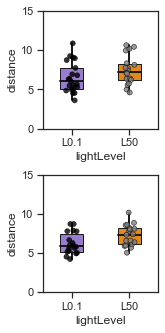

In [26]:
f, ax = plt.subplots(2,1, figsize = (w,h), sharey = True)

i=0
for v, sub in Dist_df.groupby('visit'):
#     sns.violinplot(x='lightLevel', y='distance', data = sub, 
#                    inner = None, 
#                    palette=['mediumpurple','orange'], 
#                    linewidth = 0.5,
#                    ax=ax[i])
    sns.boxplot(x='lightLevel', y='distance', data = sub, 
#                 width = 0.2,
#                 linewidth = 0.5,
                fliersize = 0,
                ax=ax[i], **boxplot_kwargs)
    sns.stripplot(x='lightLevel', y='distance', data = sub,
#                 size=2, 
#                   color="0.3",
#                   linewidth=0,
                  ax=ax[i]
                  , dodge = True
                  , **stripplot_kwargs
                 )
    
    i+=1
ax[0].set_yticks([0, 5, 10, 15])
ax[1].set_yticks([0, 5, 10, 15])
plt.tight_layout()
plt.savefig('./dataFolders/Output/KinematicAnalysis_Final/Figures/distance_filtered_boxplot.pdf')